In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels), (test_images, test_labels)=datasets.mnist.load_data()

In [3]:
train_images,test_images=train_images/255.0, test_images/255.0

In [4]:
class_names=['Zero', 'One','Two', 'Three' ,'Four', 'Five', 'Six','Seven','Eight', 'Nine']

In [5]:
print("The shapes of training images is:", train_images.shape)
print("The shapes of training images is:", train_labels.shape)

The shapes of training images is: (60000, 28, 28)
The shapes of training images is: (60000,)


In [6]:
print("The shapes of test images is:", test_images.shape)
print("The shapes of test images is:", test_labels.shape)

The shapes of test images is: (10000, 28, 28)
The shapes of test images is: (10000,)


In [7]:
print("The label values range from ", np.min(train_labels), "to" , np.max(train_labels))

The label values range from  0 to 9


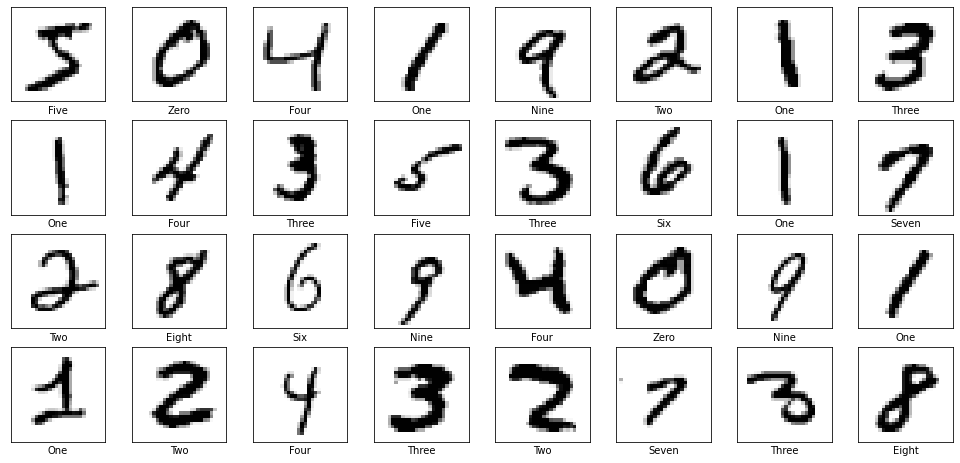

In [8]:
plt.figure(figsize=(17,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = Sequential()
model.add(LSTM(100, input_shape=(28,28)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 52,610
Trainable params: 52,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=6, validation_data=(test_images, test_labels))

Epoch 1/6
1875/1875 [==============================] - 22s 11ms/step - loss: 0.3699 - accuracy: 0.8817 - val_loss: 0.1479 - val_accuracy: 0.9558
Epoch 2/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1145 - accuracy: 0.9657 - val_loss: 0.0860 - val_accuracy: 0.9727
Epoch 3/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0782 - accuracy: 0.9760 - val_loss: 0.0692 - val_accuracy: 0.9784
Epoch 4/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0630 - val_accuracy: 0.9804
Epoch 5/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0514 - accuracy: 0.9851 - val_loss: 0.0643 - val_accuracy: 0.9815
Epoch 6/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0600 - val_accuracy: 0.9814


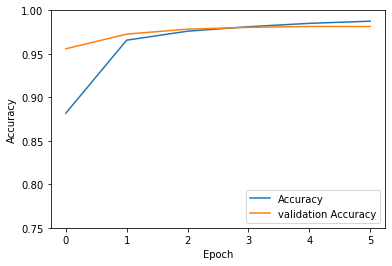

In [12]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75,1])
plt.legend(loc='lower right')

In [13]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', round(test_acc*100),'%')

313/313 - 1s - loss: 0.0600 - accuracy: 0.9814 - 1s/epoch - 3ms/step
Test accuracy: 98 %


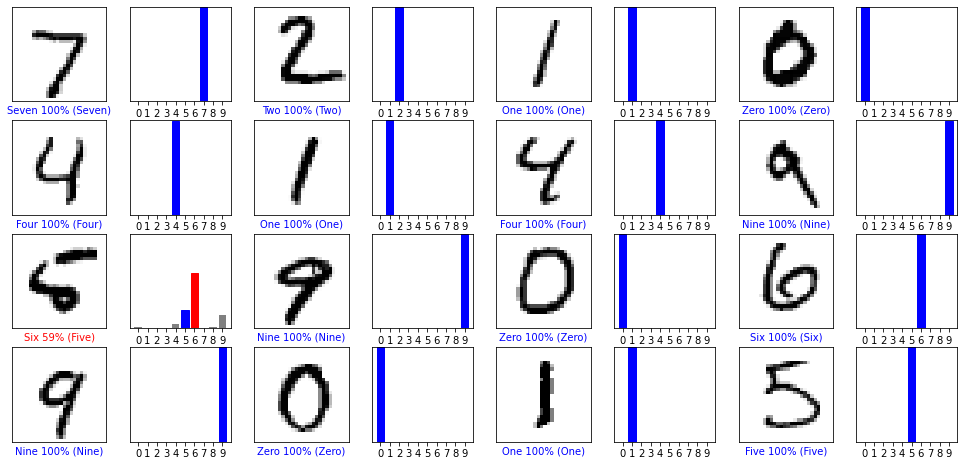

In [14]:
predictions =   model.predict(test_images)

plt.figure(figsize=(17,8))

for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i]) == test_labels[i]:
       color='blue'
    else:
       color='red'
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(predictions[i]),
                                class_names[test_labels[i]]),
                                color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions[i], color="grey")
    plt.ylim([0,1])

    thisplot[np.argmax(predictions[i])].set_color('red')
    thisplot[test_labels[i]].set_color('blue')
plt.show()

In [15]:
img=test_images[50]
print(img.shape)

(28, 28)


In [16]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [17]:
predictions_img=model.predict(img)
max_confidence=np.argmax(predictions_img[0])
print("the highest confidence is :", max_confidence)
print("the predicted class is :", class_names[max_confidence])

the highest confidence is : 6
the predicted class is : Six


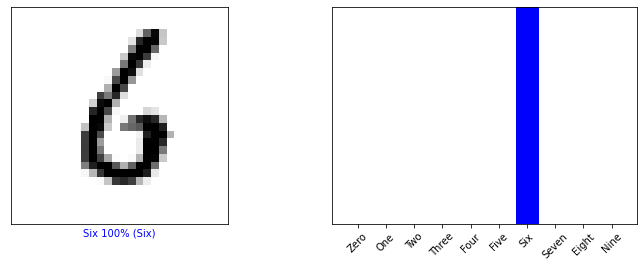

In [18]:
plt.figure(figsize=(12,4))

i=50
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
if np.argmax(predictions[i]) == test_labels[i]:
       color='blue'
else:
       color='red'
plt.imshow(test_images[i],cmap=plt.cm.binary)
plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(predictions[i]),
                                class_names[test_labels[i]]),
                                color=color)
plt.subplot(1,2,2)
plt.xticks(range(10), class_names,rotation=45)
plt.yticks([])
thisplot=plt.bar(range(10),predictions[i], color="grey")
plt.ylim([0,1])

thisplot[np.argmax(predictions[i])].set_color('red')
thisplot[test_labels[i]].set_color('blue')
plt.show()